# **Sentiment analysis over French elections 2017 vs 2022**

---


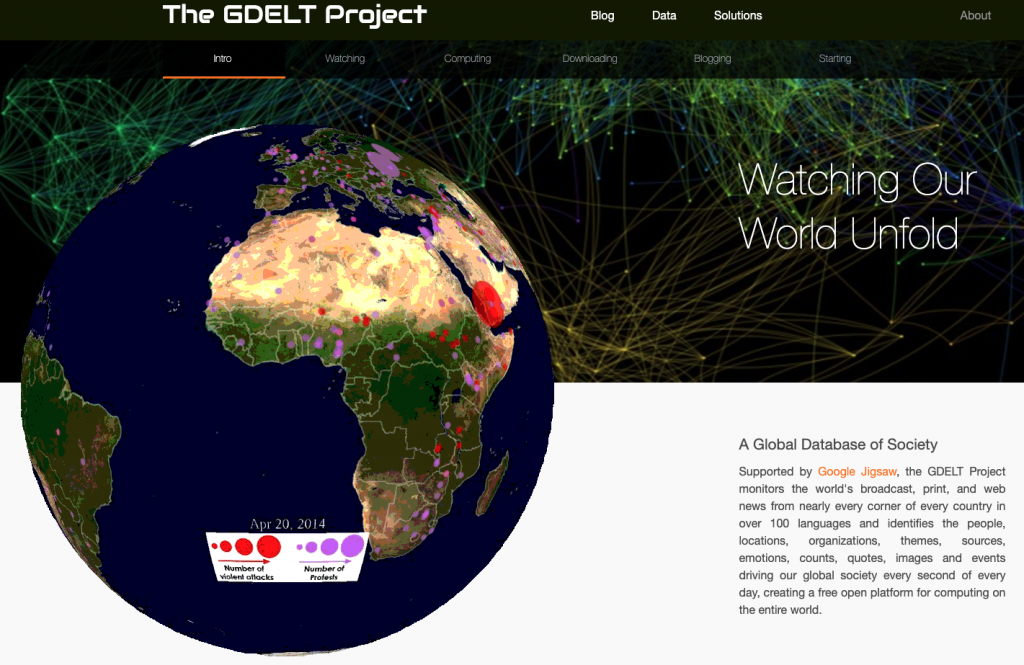

Part of the DSI 2022 Module 3 twist challenge.



## Goals:
Choose one (or both) of the following datasets, understand it/them, and find a question that requires some NLP analysis on the data to answer it:
* [GDELT Project: Global Database of Events, Language, and Tone](https://www.gdeltproject.org/)
* [ACLED Project: Armed Conflict Location & Event Data](https://acleddata.com/#/dashboard)

The focus is less on deployment and more on the quality of solving your problem (What insights can you pull out from the data and visualise it? trends, changes, influencers, summarisation, network, knowledge graph, ...).

## Time constraint
1 week

## Challenges
*   Huge and complex dataset. It uses a lot of reference codes and inconsistent formatting. By itself, this is a substantial data engineering challenge!
*   A lot of NaNs in dataset which makes finding trends and correlations difficult.
*   Error retrieving GDELT data for specific dates and times.


## Future works
*   Troubleshoot the bugs such as understanding why Macron is not findable in the data in the 'Persons' and 'V2Persons' fields of the GKG table.
*   Use more data across larger time frames to see a higher resolution evolution of the sentiment. 
*   Compare sentiments versus poll results at different time periods.
*   Re-try to query using Google BigQuery.


## References
1.  https://pypi.org/project/gdelt/
2.  https://github.com/linwoodc3/gdeltPyR
3.  http://data.gdeltproject.org/documentation/GDELT-Event_Codebook-V2.0.pdf
4.  https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/methodologies/globaldatabaseofeventslanguageandtonegdeltappendix
5.  https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/methodologies/globaldatabaseofeventslanguageandtonegdeltappendix
6.  https://uguraydemir.medium.com/exploring-the-relationship-between-gdelt-and-polling-performance-aa628ef0ffd7
7.  https://github.com/uuraydemir/2020-PresidentialElection-/blob/main/Presidential_Election.ipynb
8.  https://github.com/julianikulski/covid-19/blob/master/covid-19.ipynb
9.  https://towardsdatascience.com/making-sense-of-the-news-part-1-introduction-f171d1da65a8 


### Installing and importing necessary libraries


In [1]:
!pip install gdelt

     |████████████████████████████████| 773 kB 8.4 MB/s 
     |████████████████████████████████| 982 kB 33.4 MB/s 
     |████████████████████████████████| 761 kB 34.3 MB/s 


In [97]:
import gdelt
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = '16'

from IPython.display import display

gd2 = gdelt.gdelt(version = 2)
# If using version 1, need to downgrade pandas by !pip install pandas==0.23.1

In [3]:
# Modifying display options of inline pandas dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

### Querying and EDA of GDELT
The 2017 French presidential election was held on 23 April and 7 May 2017. As no candidate won a majority in the first round, a runoff was held between the top two candidates, Emmanuel Macron of En Marche! (EM) and Marine Le Pen of the National Front (FN), which Macron won by a decisive margin. [Source](https://en.wikipedia.org/wiki/2017_French_presidential_election)

The first round of the French elections occured on the 10th of April 2022. From Wikipedia:
"The first round of France's 2022 presidential election was held on 10 April. A run-off will be held between the top two candidates on 24 April 2022. The incumbent president, Emmanuel Macron from La République En Marche! (LREM), who won in 2017 and whose first term lasts until 13 May 2022, announced on 3 March 2022 that he was launching his re-election bid to a second five-year term for which he is eligible under the Constitution of France. His opponent in the second round will be Marine Le Pen, leader of the National Rally (RN), whom he defeated in 2017." [Source](https://en.wikipedia.org/wiki/2022_French_presidential_election)

In [4]:
# Defining seach date
# France national elections, 2017 vs 2022
query_date1 = '2017 04 23' 
query_date2 = '2022 04 10'

#query_date = '2022 02 24'

In [5]:
# Querying the events table 2017
result_events_2017 = gd2.Search([query_date1], table = 'events', coverage = True, translation=True)
print('datapoints: ', len(result_events_2017))
result_events_2017.head(5)

/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/

datapoints:  79778


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,649166635,20160423,201604,2016,2016.3096,CVL,HIKER,NaN,NaN,NaN,NaN,NaN,CVL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,193,Fight with small arms and light weapons,193,19,4,-10.0,10,1,10,3.448276,1,Malta,MT,MT,NaN,35.8333,14.5833,MT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Malta,MT,MT,NaN,35.8333,14.5833,MT,20170423001500,http://www.corrierediragusa.it/articoli/cronac...
1,649166636,20160423,201604,2016,2016.3096,GRC,LESBOS,GRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REF,REFUGEE,NaN,NaN,NaN,NaN,NaN,REF,NaN,NaN,1,042,Make a visit,042,04,1,1.9,10,1,10,-5.090909,4,"Rome, Lazio, Italy",IT,IT07,18350,41.9000,12.4833,-126693,4,"Rome, Lazio, Italy",IT,IT07,18350,41.9,12.4833,-126693,4,"Rome, Lazio, Italy",IT,IT07,18350,41.9000,12.4833,-126693,20170423001500,http://www.repretel.com/actualidad/papa-franci...
2,649166637,20160423,201604,2016,2016.3096,REF,REFUGEE,NaN,NaN,NaN,NaN,NaN,REF,NaN,NaN,GRC,LESBOS,GRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,043,Host a visit,043,04,1,2.8,10,1,10,-5.090909,4,"Rome, Lazio, Italy",IT,IT07,18350,41.9000,12.4833,-126693,4,"Rome, Lazio, Italy",IT,IT07,18350,41.9,12.4833,-126693,4,"Rome, Lazio, Italy",IT,IT07,18350,41.9000,12.4833,-126693,20170423001500,http://www.repretel.com/actualidad/papa-franci...
3,649166638,20170324,201703,2017,2017.2301,COP,POLICE OFFICER,NaN,NaN,NaN,NaN,NaN,COP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,181,"Abduct, hijack, or take hostage",181,18,4,-9.0,10,1,10,-4.739336,4,"Bogota, Cundinamarca, Colombia",CO,CO33,18585,4.6000,-74.0833,-578472,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Bogota, Cundinamarca, Colombia",CO,CO33,18585,4.6000,-74.0833,-578472,20170423001500,http://www.elespectador.com/noticias/judicial/...
4,649166639,20170416,201704,2017,2017.2904,CVL,INDIGENOUS PEOPLE,NaN,NaN,NaN,NaN,NaN,CVL,NaN,NaN,GOV,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,GOV,NaN,NaN,1,012,Make pessimistic comment,012,01,1,-0.4,10,1,10,-4.597701,1,Colombia,CO,CO,NaN,4.0000,-72.0000,CO,1,Colombia,CO,CO,NaN,4.0,-72.0000,CO,1,Colombia,CO,CO,NaN,4.0000,-72.0000,CO,20170423001500,http://www.radio1000.com.py/show/42888


In [6]:
# Querying the events table 2022
result_events_2022 = gd2.Search([query_date2], table = 'events', coverage = True, translation=True)
print('datapoints: ', len(result_events_2022))
result_events_2022.head(5)

/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/pool.py:121: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  result = (True, func(*args, **kwds))
/usr/lib/python3.7/multiprocessing/

datapoints:  44372


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1038614616,20210410,202104,2021,2021.2740,TUR,TURKEY,TUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,111,Criticize or denounce,111,11,3,-2.0,10,1,10,2.148228,4,"Aytac, Trabzon, Turkey",TU,TU61,28304,40.6867,39.9072,-736978,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Aytac, Trabzon, Turkey",TU,TU61,28304,40.68670,39.9072,-736978,20220410000000,https://www.sondakika.com/haber/haber-fiat-ege...
1,1038614617,20220409,202204,2022,2022.2712,UKR,UKRAINE,UKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,036,Express intent to meet or negotiate,036,03,1,4.0,2,1,2,1.769912,4,"Kiev, Ukraine (general), Ukraine",UP,UP00,28554,50.4333,30.5167,-1044367,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Russia,RS,RS,NaN,60.00000,100.0000,RS,20220410000000,https://www.index.hr/vijesti/clanak/eu-ponovno...
2,1038614618,20220410,202204,2022,2022.2740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRA,BRAZIL,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,042,Make a visit,042,04,1,1.9,2,1,2,1.098901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Camaragibe, Estado de Pernambuco, Brazil",BR,BR30,18585.0,-8.01667,-34.9667,-633640,4,"Camaragibe, Estado de Pernambuco, Brazil",BR,BR30,18585,-8.01667,-34.9667,-633640,20220410000000,https://g1.globo.com/pe/pernambuco/o-que-fazer...
3,1038614619,20220410,202204,2022,2022.2740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRA,BRAZIL,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,042,Make a visit,042,04,1,1.9,8,1,8,1.098901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Pernambuco, Estado de Pernambuco, Brazil",BR,BR30,18585.0,-8.05000,-34.9000,-665520,4,"Pernambuco, Estado de Pernambuco, Brazil",BR,BR30,18585,-8.05000,-34.9000,-665520,20220410000000,https://g1.globo.com/pe/pernambuco/o-que-fazer...
4,1038614620,20220410,202204,2022,2022.2740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRA,BRAZIL,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,042,Make a visit,042,04,1,1.9,6,1,6,-3.500000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Brazil,BR,BR,NaN,-10.00000,-55.0000,BR,1,Brazil,BR,BR,NaN,-10.00000,-55.0000,BR,20220410000000,https://whiplash.net/materias/news_720/340642-...


In [7]:
# #result_events_macron = result_events[(result_events == 'macron').any(axis=1)]
# result_events_macron = result_events[result_events.isin(['macron', 'trump']).any(axis=1)]
# print('datapoints: ', len(result_events_macron))
# result_events_macron.head(5)

In [8]:
# looking at French related content
result_events_2017_fr = result_events_2017[result_events_2017['ActionGeo_FullName'].str.contains('France', na=False)]
print('datapoints: ', len(result_events_2017_fr))
result_events_2017_fr.head(5)

datapoints:  4936


,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_ADM2Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_ADM2Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
22,649166657,20170423,201704,2017,2017.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFR,AFRICA,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,042,Make a visit,042,04,1,1.9,10,1,10,-0.476190,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Paris, France (general), France",FR,FR00,16282,48.8667,2.33333,-1456928,4,"Paris, France (general), France",FR,FR00,16282,48.8667,2.33333,-1456928,20170423001500,http://www.jcnet.com.br/Cultura/2017/04/fellip...
35,649166670,20170423,201704,2017,2017.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUS,COMPANIES,NaN,NaN,NaN,NaN,NaN,BUS,NaN,NaN,1,051,Praise or endorse,051,05,1,3.4,10,1,10,-2.056075,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,France,FR,FR,NaN,46.0000,2.00000,FR,1,France,FR,FR,NaN,46.0000,2.00000,FR,20170423001500,http://www.corsematin.com/article/france-monde...
43,649166678,20170423,201704,2017,2017.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COP,POLICE OFFICER,NaN,NaN,NaN,NaN,NaN,COP,NaN,NaN,1,152,Increase military alert status,152,15,4,-7.2,10,1,10,-4.587156,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Paris, France (general), France",FR,FR00,16282,48.8667,2.33333,-1456928,4,"Paris, France (general), France",FR,FR00,16282,48.8667,2.33333,-1456928,20170423001500,http://www.notisistema.com/noticias/hombre-ame...
48,649166683,20170423,201704,2017,2017.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CVL,CIVILIAN,NaN,NaN,NaN,NaN,NaN,CVL,NaN,NaN,0,042,Make a visit,042,04,1,1.9,10,1,10,-0.686499,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,France,FR,FR,NaN,46.0000,2.00000,FR,1,France,FR,FR,NaN,46.0000,2.00000,FR,20170423001500,http://www.rfi.fr/france/20170423-france-presi...
65,649166700,20170423,201704,2017,2017.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRA,FRANCE,FRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,052,Defend verbally,052,05,1,3.5,10,1,10,-2.208835,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,"Paris, France (general), France",FR,FR00,16282,48.8667,2.33333,-1456928,4,"Paris, France (general), France",FR,FR00,16282,48.8667,2.33333,-1456928,20170423001500,http://trentinocorrierealpi.gelocal.it/italia-...


In [9]:
# Querying the mentions table 2017
result_mentions_2017 = gd2.Search([query_date1], table = 'mentions')
print('datapoints: ', len(result_mentions_2017))
result_mentions_2017.head(5)

datapoints:  4454


/usr/local/lib/python3.7/dist-packages/gdelt/base.py:623: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  results = _mp_worker(self.download_list, proxies=self.proxies)


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,533341394,20160423011500,20170423234500,1,business-standard.com,http://www.business-standard.com/article/pti-s...,12,-1,2030,2012,1,50,2016,-9.356725,NaN,NaN
1,649350688,20170423234500,20170423234500,1,cbc.ca,http://www.cbc.ca/news/canada/montreal/montrea...,13,-1,1959,1880,1,100,2373,-0.475059,NaN,NaN
2,649350689,20170423234500,20170423234500,1,kbzk.com,http://www.kbzk.com/story/35221163/who-is-mari...,6,-1,3165,3105,1,40,4547,-0.126263,NaN,NaN
3,649350690,20170423234500,20170423234500,1,kbzk.com,http://www.kbzk.com/story/35221163/who-is-mari...,6,-1,3165,3105,0,20,4547,-0.126263,NaN,NaN
4,649350691,20170423234500,20170423234500,1,247wallst.com,http://247wallst.com/special-report/2017/04/23...,3,-1,898,882,1,50,28882,-3.315456,NaN,NaN


In [10]:
# Querying the mentions table 2022
result_mentions_2022 = gd2.Search([query_date2], table = 'mentions')
print('datapoints: ', len(result_mentions_2022))
result_mentions_2022.head(5)

/usr/local/lib/python3.7/dist-packages/gdelt/base.py:623: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  results = _mp_worker(self.download_list, proxies=self.proxies)


datapoints:  2005


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,1038719334,20220410224500,20220410234500,1,japantoday.com,https://japantoday.com/category/world/Ukrainia...,3,742,831,861,0,10,7738,-5.044752,NaN,NaN
1,1038715462,20220410214500,20220410234500,1,accesswdun.com,https://accesswdun.com/article/2022/4/1093635,3,750,839,869,0,10,8024,-5.063291,NaN,NaN
2,1038715462,20220410214500,20220410234500,1,japantoday.com,https://japantoday.com/category/world/Ukrainia...,3,742,831,861,0,10,7738,-5.044752,NaN,NaN
3,1038715462,20220410214500,20220410234500,1,yorkdispatch.com,https://www.yorkdispatch.com/story/news/2022/0...,4,954,1043,1073,0,10,8295,-5.084746,NaN,NaN
4,1038715463,20220410214500,20220410234500,1,accesswdun.com,https://accesswdun.com/article/2022/4/1093635,3,750,839,869,0,10,8024,-5.063291,NaN,NaN


In [11]:
# Querying the global knowledge graph (gkg) table 2017
# gkg = gd2.Search(['2016 08 01', '2016 08 05'], table = 'gkg', coverage = True) #range date doesn't work
result_gkg_2017 = gd2.Search([query_date1], table = 'gkg')

print('datapoints: ', len(result_gkg_2017))
result_gkg_2017.head(5)

#print(result_gkg.iloc[0])

/usr/local/lib/python3.7/dist-packages/gdelt/base.py:623: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  results = _mp_worker(self.download_list, proxies=self.proxies)


datapoints:  1838


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,20170423234500-0,20170423234500,1,kxxv.com,http://www.kxxv.com/story/35220951/police-pick...,NaN,NaN,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...,"MEDIA_SOCIAL,1478;TAX_FNCACT_POLICE_OFFICER,10...","2#Maine, United States#US#USME#44.6074#-69.397...","4#Belfast, Belfast, United Kingdom#UK#UKR3#401...",daniel fitzpatrick;fitzpatrick facebook,"Daniel Fitzpatrick,105;Daniel Fitzpatrick,393;...",belfast police department in belfast;associate...,"Associated Press,1838","-0.993377483443709,0.993377483443709,1.9867549...",NaN,"wc:281,c12.1:11,c12.10:19,c12.12:4,c12.13:7,c1...",http://APMOBILE.images.worldnow.com/images/136...,http://APMOBILE.images.worldnow.com/images/136...,NaN,NaN,NaN,"Belfast Police Department,61;Daniel Fitzpatric...","2,lost goats,140;2,lost goats,354;2,lost goats...",NaN,NaN
1,20170423234500-1,20170423234500,1,victorharbortimes.com.au,http://www.victorharbortimes.com.au/story/4615...,NaN,NaN,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...,"SOC_POINTSOFINTEREST_POLICE_STATION,823;WB_168...","4#Perth, Western Australia, Australia#AS#AS08#...","4#Perth, Western Australia, Australia#AS#AS08#...",NaN,NaN,NaN,NaN,"-3.2258064516129,0,3.2258064516129,3.225806451...",NaN,"wc:146,c12.1:3,c12.10:5,c12.12:4,c12.13:1,c12....",http://nnimgt-a.akamaihd.net/transform/v1/crop...,NaN,NaN,NaN,NaN,"North Coast,62;Broken Hill The,180;Highway Pat...","11000000,when they noticed his,316;",NaN,<PAGE_AUTHORS>Australian Community Media - Fai...
2,20170423234500-2,20170423234500,1,tipperarycrystal.ie,https://www.tipperarycrystal.ie/cart.php?sugge...,NaN,NaN,TAX_ECON_PRICE;,"TAX_ECON_PRICE,312;",NaN,NaN,NaN,NaN,your shopping cart gift delivery service,"Your Shopping Cart Gift Delivery Service,41","6.45161290322581,6.45161290322581,0,6.45161290...",NaN,"wc:83,c12.1:6,c12.10:6,c12.12:1,c12.13:2,c12.1...",NaN,https://cdn6.bigcommerce.com/s-t724mkv/templat...,NaN,https://youtube.com/embed/sgdbpcgyfik?rel=0&sh...,NaN,"Order Comments,140",NaN,NaN,NaN
3,20170423234500-3,20170423234500,1,thereporter.com.au,https://www.thereporter.com.au/news/numerous-w...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_MAASAI;TAX_WORLDLA...,"RURAL,4166;TAX_FNCACT_WARRIORS,363;TAX_FNCACT_...","4#Mount Mellum, Queensland, Australia#AS#AS04#...","4#Mount Mellum, Queensland, Australia#AS#AS04#...",samuel johnson,"Samuel Johnson,2616;Samuel Johnson,2810",ipswich city centre;shamrock hotel,"Ipswich City Centre,3257;Shamrock Hotel,5176","2.12121212121212,4.44444444444444,2.3232323232...",1#0#0#1950#3401;1#0#0#1920#4527,"wc:895,c1.1:3,c1.2:1,c12.1:66,c12.10:88,c12.12...",https://media.apnarm.net.au/media/images/2017/...,https://media.apnarm.net.au/media/images/2017/...,NaN,NaN,NaN,"Gold Logie Winner,2797;Gold Logie,2835;Flinder...","2,wives,389;3,children,402;2,wives,480;2,will ...",NaN,<PAGE_LINKS>https://www.thereporter.com.au/cla...
4,20170423234500-4,20170423234500,1,nytimes.com,https://www.nytimes.com/2017/04/23/arts/music/...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_WOMAN;TAX_FNCACT_MERCHAN...,"TAX_RELIGION_MORAVIAN,3942;TAX_ETHNICITY_MORAV...",1#United States#US#US#38#-97#US;1#Czech Republ...,1#Czech#EZ#EZ##49.75#15.5#EZ#985;1#United Stat...,robert t jones;sara couden;charlie corcoran;sa...,"Sara Couden,2491;Charlie Corcoran,3400;Samanth...",nytimes;juilliard school;united states,"Nytimes,4641;Nytimes,4679;Juilliard School,667...","-0.851581508515815,4.50121654501217,5.35279805...",1#0#0#1921#1857,"wc:753,c1.1:1,c1.3:1,c12.1:67,c12.10:66,c12.12...",https://static01.nyt.com/images/2017/04/24/art...,NaN,NaN,NaN,NaN,"Juilliard School,707;Stephen Wadsworth,782;Pet...","2,young people who openly,2652;1,complimentary...",NaN,<PAGE_LINKS>http://samuellevinetenor.com/;http...


In [12]:
# Querying the global knowledge graph (gkg) table 2022
result_gkg_2022 = gd2.Search([query_date2], table = 'gkg')

print('datapoints: ', len(result_gkg_2022))
result_gkg_2022.head(5)

#print(result_gkg.iloc[0])

datapoints:  704


/usr/local/lib/python3.7/dist-packages/gdelt/base.py:623: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  results = _mp_worker(self.download_list, proxies=self.proxies)


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,20220410234500-0,20220410234500,1,menafn.com,https://menafn.com/1103988878/Australian-Dolla...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;ECON_WO...,"ECON_WORLDCURRENCIES_DOLLAR,34;ECON_WORLDCURRE...",1#China#CH#CH#35#105#CH;1#Australia#AS#AS#-25#...,1#Chinese#CH#CH##35#105#CH#206;1#Japan#JA#JA##...,thomas westwater,"Thomas Westwater,3150",bloomberg;people bank;energy information admin...,"Bloomberg,891;People Bank,1098;Energy Informat...","-1.88034188034188,0.512820512820513,2.39316239...",NaN,"wc:538,c1.2:3,c12.1:41,c12.10:63,c12.11:1,c12....",https://menafn.com/updates/pr/2022-04/10/D_84c...,NaN,NaN,NaN,NaN,"Australian Dollar,34;Technical Outlook,103;Aus...","2,countries,1108;100,mark if prices come,2164;",NaN,<PAGE_LINKS>https://menafn.com</PAGE_LINKS><PA...
1,20220410234500-1,20220410234500,1,newidea.com.au,https://www.newidea.com.au/jana-pittman-twins-...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_BABIES;,"TAX_FNCACT_BABIES,350;TAX_FNCACT_BABIES,1899;T...","1#Australia#AS#AS#-25#135#AS;4#Sydney, New Sou...","4#Sydney, New South Wales, Australia#AS#AS02#1...",yianni aspradakis;paul gatward;chris rawlinson,"Yianni Aspradakis,36;Yianni Aspradakis,1347;Yi...",NaN,NaN,"1.34969325153374,4.29447852760736,2.9447852760...",NaN,"wc:703,c12.1:72,c12.10:67,c12.11:1,c12.12:17,c...",http://www.newidea.com.au/media/115070/header-...,https://www.newidea.com.au/media/115075/landsc...,NaN,NaN,281|110||But I could feel the contractions sta...,"Royal Hospital,429;Paul Gatward,1005;Chris Raw...","5000000,with the baby,639;6,kids now under the...",NaN,<PAGE_LINKS>https://www.newidea.com.au/jana-pi...
2,20220410234500-2,20220410234500,1,somersetlive.co.uk,https://www.somersetlive.co.uk/news/uk-world-n...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_QUEEN;TAX_DISEASE;TAX_DI...,"TAX_FNCACT_IMAM,3549;TAX_FNCACT_IMAM,3751;CRIS...","4#London, London, City Of, United Kingdom#UK#U...","4#Buckingham Palace, Westminster, United Kingd...",mireia lopez rey ferrer;polly fitch;imam faruq...,"Mireia Lopez Rey Ferrer,2686;Polly Fitch,3382;...",NaN,NaN,"-0.657030223390276,2.6281208935611,3.285151116...",1#0#0#2008#2774,"wc:701,c1.4:2,c12.1:62,c12.10:65,c12.11:1,c12....",https://i2-prod.bristolpost.co.uk/incoming/art...,NaN,NaN,NaN,"842|67||we held their hands , we wiped their t...","Buckingham Palace,294;Royal London Hospital,50...","800,people,696;5,weeks,781;5,months,835;7,week...",NaN,<PAGE_AUTHORS>Richard Blackledge;Tony Jones;PA...
3,20220410234500-3,20220410234500,1,missoulian.com,https://missoulian.com/lifestyles/health-med-f...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_TRUCKERS;CRISISLEX_CRISI...,"HEALTH_VACCINATION,219;HEALTH_VACCINATION,808;...","3#Los Angeles City Hall, California, United St...","3#-Oakland, California, United States#US#USCA#...",robert jablon;assemblymember buffy wicks;paul ...,"Robert Jablon,2768;Assemblymember Buffy Wicks,...",associated press,"Associated Press,40;Associated Press,2845","-3.18471337579618,2.33545647558386,5.520169851...",NaN,"wc:431,c1.4:1,c12.1:24,c12.10:32,c12.12:12,c12...",https://bloximages.chicago2.vip.townnews.com/m...,NaN,NaN,NaN,NaN,"Los Angeles City Hall,182;Grand Park,280;New Y...","2,variant was spreading,903;5,months for faili...",NaN,<PAGE_AUTHORS>DAMIAN DOVARGANES - Associated P...
4,20220410234500-4,20220410234500,1,britainnews.net,https://www.britainnews.net/news/272469495/hor...,NaN,NaN,NaN,NaN,"3#Washington, Washington, United States#US#USD...","3#Washington, Washington, United States#US#USD...",corey kispert;cody martin;rui hachimura;terry ...,"Corey Kispert,1084;Cody Martin,2063;Rui Hachim...",NaN,NaN,"0.221238938053097,1.76991150442478,1.548672566...",NaN,"wc:418,c12.1:13,c12.10:38,c12.12:19,c12.13:3,c...",https://c

In [13]:
#len(result_events_2017.columns)

62

In [14]:
# Understanding the dataset event column descriptions
# http://data.gdeltproject.org/documentation/GDELT-Event_Codebook-V2.0.pdf
list(result_events_2017.columns)

['GLOBALEVENTID',
 'SQLDATE',
 'MonthYear',
 'Year',
 'FractionDate',
 'Actor1Code',
 'Actor1Name',
 'Actor1CountryCode',
 'Actor1KnownGroupCode',
 'Actor1EthnicCode',
 'Actor1Religion1Code',
 'Actor1Religion2Code',
 'Actor1Type1Code',
 'Actor1Type2Code',
 'Actor1Type3Code',
 'Actor2Code',
 'Actor2Name',
 'Actor2CountryCode',
 'Actor2KnownGroupCode',
 'Actor2EthnicCode',
 'Actor2Religion1Code',
 'Actor2Religion2Code',
 'Actor2Type1Code',
 'Actor2Type2Code',
 'Actor2Type3Code',
 'IsRootEvent',
 'EventCode',
 'CAMEOCodeDescription',
 'EventBaseCode',
 'EventRootCode',
 'QuadClass',
 'GoldsteinScale',
 'NumMentions',
 'NumSources',
 'NumArticles',
 'AvgTone',
 'Actor1Geo_Type',
 'Actor1Geo_FullName',
 'Actor1Geo_CountryCode',
 'Actor1Geo_ADM1Code',
 'Actor1Geo_ADM2Code',
 'Actor1Geo_Lat',
 'Actor1Geo_Long',
 'Actor1Geo_FeatureID',
 'Actor2Geo_Type',
 'Actor2Geo_FullName',
 'Actor2Geo_CountryCode',
 'Actor2Geo_ADM1Code',
 'Actor2Geo_ADM2Code',
 'Actor2Geo_Lat',
 'Actor2Geo_Long',
 'Actor2G

In [15]:
# Understanding the dataset mentions column descriptions
list(result_mentions_2017.columns)

['GLOBALEVENTID',
 'EventTimeDate',
 'MentionTimeDate',
 'MentionType',
 'MentionSourceName',
 'MentionIdentifier',
 'SentenceID',
 'Actor1CharOffset',
 'Actor2CharOffset',
 'ActionCharOffset',
 'InRawText',
 'Confidence',
 'MentionDocLen',
 'MentionDocTone',
 'MentionDocTranslationInfo',
 'Extras']

In [16]:
# Understanding the dataset gkg column descriptions
list(result_gkg_2017.columns)

['GKGRECORDID',
 'DATE',
 'SourceCollectionIdentifier',
 'SourceCommonName',
 'DocumentIdentifier',
 'Counts',
 'V2Counts',
 'Themes',
 'V2Themes',
 'Locations',
 'V2Locations',
 'Persons',
 'V2Persons',
 'Organizations',
 'V2Organizations',
 'V2Tone',
 'Dates',
 'GCAM',
 'SharingImage',
 'RelatedImages',
 'SocialImageEmbeds',
 'SocialVideoEmbeds',
 'Quotations',
 'AllNames',
 'Amounts',
 'TranslationInfo',
 'Extras']

In [17]:
# Understanding the dataset persons column
result_gkg_2017.Persons.head(5)

0              daniel fitzpatrick;fitzpatrick facebook
1                                                  NaN
2                                                  NaN
3                                       samuel johnson
4    robert t jones;sara couden;charlie corcoran;sa...
Name: Persons, dtype: object

In [18]:
# Understanding the dataset v2persons column
result_gkg_2017.V2Persons.head(5)

0    Daniel Fitzpatrick,105;Daniel Fitzpatrick,393;...
1                                                  NaN
2                                                  NaN
3              Samuel Johnson,2616;Samuel Johnson,2810
4    Sara Couden,2491;Charlie Corcoran,3400;Samanth...
Name: V2Persons, dtype: object

In [19]:
# Understanding the dataset allnames column
result_gkg_2017.AllNames.head(5)

0    Belfast Police Department,61;Daniel Fitzpatric...
1    North Coast,62;Broken Hill The,180;Highway Pat...
2                                   Order Comments,140
3    Gold Logie Winner,2797;Gold Logie,2835;Flinder...
4    Juilliard School,707;Stephen Wadsworth,782;Pet...
Name: AllNames, dtype: object

As can be seen from the events, mentions, and gkg table, the only table where individual actors can be obtained is from the gkg table. 

### Data pre-processing

In [20]:
# Only selecting data from France in 2017
#result_gkg_2017_france = result_gkg_2017[result_gkg["V2Locations"].notnull()].query("V2Locations.str.contains('France#')", engine = "python")
result_gkg_2017_france = result_gkg_2017.query("Locations.str.contains('France') or Locations.str.contains('FR') or V2Locations.str.contains('France#') or V2Locations.str.contains('FR#')", engine = "python")

print('datapoints: ', len(result_gkg_2017_france))
result_gkg_2017_france.head(5)

datapoints:  203


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
29,20170423234500-29,20170423234500,1,thereporter.com.au,https://www.thereporter.com.au/news/french-ele...,KILL#130##1#Australia#AS#AS#-27#133#AS;CRISISL...,KILL#130##1#Australia#AS#AS#-27#133#AS#1186;CR...,TAX_ETHNICITY;TAX_ETHNICITY_FRENCH;TAX_WORLDLA...,"TAX_FNCACT_CANDIDATES,1022;TAX_FNCACT_CANDIDAT...","4#Mount Mellum, Queensland, Australia#AS#AS04#...","4#Mount Mellum, Queensland, Australia#AS#AS04#...",francois fillon;marine le pen;jean-luc melench...,"Francois Fillon,1694;Marine Le Pen,37;Jean-Luc...",express;ipswich city centre;right national fro...,"Express,3085;Ipswich City Centre,4758;Right Na...","-0.670578373847443,3.43671416596815,4.10729253...",4#5#7#0#637;1#0#0#1950#4885;1#0#0#1920#6011,"wc:1105,c1.1:3,c1.2:1,c12.1:63,c12.10:99,c12.1...",https://media.apnarm.net.au/media/images/2017/...,https://media.apnarm.net.au/media/images/2017/...,NaN,NaN,NaN,"Marine Le Pen,35;Emmanuel Macron,177;National ...","2,candidates who will go,852;130,people died,1...",NaN,<PAGE_LINKS>https://www.thereporter.com.au/cla...
36,20170423234500-36,20170423234500,1,therepublic.com,http://www.therepublic.com/2017/04/23/us-bloom...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_LEADERS;LEADER;TAX_FNCAC...,"BAN,2633;TAX_POLITICAL_PARTY_REPUBLICANS,3340;...","2#New York, United States#US#USNY#42.1497#-74....","2#New York, United States#US#USNY##42.1497#-74...",carl pope;donald trump;michael bloomberg;hilla...,"Carl Pope,671;Carl Pope,4558;Donald Trump,117;...",bloomberg;sierra club;white house;democratic p...,"Bloomberg,60;Bloomberg,253;Bloomberg,729;Bloom...","-1.0498687664042,3.01837270341207,4.0682414698...",1#0#0#2005#1190,"wc:709,c1.2:3,c1.3:17,c12.1:42,c12.10:73,c12.1...",http://d1bdhkmqqz901h.cloudfront.net/1200x630/...,NaN,NaN,NaN,NaN,"New York,25;Michael Bloomberg,55;President Don...","3,terms,260;6000000000,tons,1053;1000000,of do...",NaN,<PAGE_AUTHORS>The Associated Press</PAGE_AUTHO...
61,20170423234500-61,20170423234500,1,orlytaitzesq.com,http://www.orlytaitzesq.com/latest-vote-count-...,NaN,NaN,EPU_CATS_REGULATION;USPEC_POLITICS_GENERAL1;CO...,"GENERAL_GOVERNMENT,835;GENERAL_GOVERNMENT,875;...",1#France#FR#FR#46#2#FR,1#France#FR#FR##46#2#FR#1170,marine le pen;santa margarita;orly taitz,"Marine Le Pen,1254;Santa Margarita,57;Santa Ma...",world affairs;our freedoms foundation,"World Affairs,186;Our Freedoms Foundation,30;O...","-3.08370044052863,3.08370044052863,6.167400881...",1#0#0#2014#117,"wc:205,c12.1:16,c12.10:14,c12.12:5,c12.13:2,c1...",NaN,NaN,NaN,https://youtube.com/embed/948FBVCqTu4?rel=0;ht...,NaN,"Defend Our Freedoms Foundation,31;Margarita Pk...","29839,Santa Margarita Pkwy,38;100,Rancho Santa...",NaN,<PAGE_AUTHORS>Name (required)</PAGE_AUTHORS>
63,20170423234500-63,20170423234500,1,bunburymail.com.au,http://www.bunburymail.com.au/story/4615221/wa...,NaN,NaN,TAX_WORLDFISH;TAX_WORLDFISH_SHARK;CRISISLEX_CR...,"TAX_FNCACT_CARDINAL,4585;TAX_WORLDMAMMALS_HORS...","1#Vietnam, Republic Of#VM#VM#16#106#VM;1#Unite...","4#Pinjarra, Western Australia, Australia#AS#AS...",james white;bob mossman;gladys berejiklian;vla...,"James White,1097;Bob Mossman,1244;Gladys Berej...",china ministry of defence;roman catholic churc...,"China Ministry Of Defence,3918;Roman Catholic ...","-0.376884422110553,3.01507537688442,3.39195979...",1#0#0#1967#4466;1#0#0#2005#4603;4#4#10#0#4769,"wc:726,c1.1:1,c1.2:1,c12.1:38,c12.10:59,c12.12...",http://nnimgt-a.akamaihd.net/transform/v1/crop...,NaN,http://pic.twitter.com/iyfXdP1hUs;,https://youtube.com/embed/qKn7XAMNV-g?ecver=1;,NaN,"Singleton Beach,179;Marta Pascual,254;Singleto...","20,city cross,2284;91,on Friday,3457;1,when it...",NaN,<PAGE_LINKS>http://www.bunburymail.com.au/stor...
69,20170423234500-69,20

In [21]:
#result_gkg_2017.SourceCommonName.nunique()

557

In [22]:
# Only selecting data from France in 2017 about the elections
result_gkg_2017_france_elections = result_gkg_2017_france.query("Themes.str.contains('ELECTION') or V2Themes.str.contains('ELECTION')", engine = "python")

print('datapoints: ', len(result_gkg_2017_france_elections))
result_gkg_2017_france_elections.head(1)

datapoints:  152


,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
29,20170423234500-29,20170423234500,1,thereporter.com.au,https://www.thereporter.com.au/news/french-ele...,KILL#130##1#Australia#AS#AS#-27#133#AS;CRISISL...,KILL#130##1#Australia#AS#AS#-27#133#AS#1186;CR...,TAX_ETHNICITY;TAX_ETHNICITY_FRENCH;TAX_WORLDLA...,"TAX_FNCACT_CANDIDATES,1022;TAX_FNCACT_CANDIDAT...","4#Mount Mellum, Queensland, Australia#AS#AS04#...","4#Mount Mellum, Queensland, Australia#AS#AS04#...",francois fillon;marine le pen;jean-luc melench...,"Francois Fillon,1694;Marine Le Pen,37;Jean-Luc...",express;ipswich city centre;right national fro...,"Express,3085;Ipswich City Centre,4758;Right Na...","-0.670578373847443,3.43671416596815,4.10729253...",4#5#7#0#637;1#0#0#1950#4885;1#0#0#1920#6011,"wc:1105,c1.1:3,c1.2:1,c12.1:63,c12.10:99,c12.1...",https://media.apnarm.net.au/media/images/2017/...,https://media.apnarm.net.au/media/images/2017/...,NaN,NaN,NaN,"Marine Le Pen,35;Emmanuel Macron,177;National ...","2,candidates who will go,852;130,people died,1...",NaN,<PAGE_LINKS>https://www.thereporter.com.au/cla...


In [23]:
#result_gkg_france_elections.Persons.head(5)
result_gkg_2017_france.Persons.head(25)

29     francois fillon;marine le pen;jean-luc melench...
36     carl pope;donald trump;michael bloomberg;hilla...
61              marine le pen;santa margarita;orly taitz
63     james white;bob mossman;gladys berejiklian;vla...
69     francois fillon;sylvie bermann;donald trump;ni...
80     francois fillon;marine le pen;bernard cazeneuv...
82     carl pope;donald trump;michael bloomberg;hilla...
93                                                   NaN
103    pierrette lalanne;marion anne perrine le;marin...
104    mezut ozil;mesut ozil;nacho monreal;alexis san...
107           francois fillon;marine le pen;donald trump
108               charlie hebdo;gert hofstede;abu ghraib
112    francois fillon;donald trump;nicolas dupont-ai...
121    marine le pen;renaud lavillenie;juergen klinsm...
133    marine le pen;jean-luc melenchon;philip crowth...
135    marine le pen;renaud lavillenie;juergen klinsm...
137     francois fillon;marine le pen;jean-luc melenchon
142    francois fillon;samuel p

In [24]:
#result_gkg_france_elections.V2Persons.head(5)
result_gkg_2017_france.V2Persons.head(25)

29     Francois Fillon,1694;Marine Le Pen,37;Jean-Luc...
36     Carl Pope,671;Carl Pope,4558;Donald Trump,117;...
61     Marine Le Pen,1254;Santa Margarita,57;Santa Ma...
63     James White,1097;Bob Mossman,1244;Gladys Berej...
69     Francois Fillon,1342;Francois Fillon,1874;Fran...
80     Francois Fillon,1978;Marine Le Pen,69;Bernard ...
82     Carl Pope,624;Carl Pope,4400;Donald Trump,100;...
93                                                   NaN
103    Pierrette Lalanne,3670;Marion Anne Perrine Le,...
104    Mezut Ozil,956;Mesut Ozil,1482;Nacho Monreal,8...
107    Francois Fillon,3140;Marine Le Pen,55;Marine L...
108    Charlie Hebdo,4398;Gert Hofstede,54;Abu Ghraib...
112    Francois Fillon,1061;Donald Trump,4900;Nicolas...
121    Marine Le Pen,268;Marine Le Pen,1028;Marine Le...
133    Marine Le Pen,392;Jean-Luc Melenchon,3879;Phil...
135    Marine Le Pen,264;Marine Le Pen,1083;Marine Le...
137    Francois Fillon,550;Marine Le Pen,23;Marine Le...
142    Francois Fillon,549;Samu

In [25]:
result_gkg_2017_france_elections.AllNames.head(5)

29    Marine Le Pen,35;Emmanuel Macron,177;National ...
36    New York,25;Michael Bloomberg,55;President Don...
69    Left Bank,231;Ernest Hemingway,269;Nicolas Sar...
80    Emmanuel Macron,37;Marine Le Pen,74;Interior M...
82    New York,11;Michael Bloomberg,41;President Don...
Name: AllNames, dtype: object

### A primer on V2Tone
Taken from: http://data.gdeltproject.org/documentation/GDELT-Global_Knowledge_Graph_Codebook-V2.1.pdf 

In the GDELT GKG table, this field contains a comma-delimited list of six core emotional dimensions. This field is nearly identical in format and population as the corresponding field in the GKG 1.0 format with the sole exception of adding the single new WordCount variable at the end. Note all of the subfields are floating point numbers except the last one which is an integer.

* **Tone**: This is the average “tone” of the document as a whole. The score ranges from -100 (extremely negative) to +100 (extremely positive). Common values range between -10 and +10, with 0 indicating neutral. This is calculated as Positive Score minus Negative Score. Note that both Positive Score and Negative Score are available separately below as well. A document with a Tone score close to zero may either have low emotional response or may have a Positive Score and Negative Score that are roughly equivalent to each other, such that they nullify each other. These situations can be detected either through looking directly at the Positive Score and Negative Score variables or through the Polarity variable.

* **Positive Score**: This is the percentage of all words in the article that were found to have a positive emotional connotation. Ranges from 0 to +100.

* **Negative Score**: This is the percentage of all words in the article that were found to have a negative emotional connotation. Ranges from 0 to +100.

* **Polarity**:  This is the percentage of words that had matches in the tonal dictionary as an indicator of how emotionally polarized or charged the text is. If Polarity is high, but Tone is neutral, this suggests the text was highly emotionally charged, but had roughly equivalent numbers of positively and negatively charged emotional words.

* **Activity Reference Density**: This is the percentage of words that were active words offering a very basic proxy of the overall “activeness” of the text compared with a clinically descriptive text.

* **Self/Group Reference Density**: This is the percentage of all words in the article that are pronouns, capturing a combination of self-references and group-based discourse. News media material tends to have very low densities of such language, but this can be used to distinguish certain classes of news media and certain contexts.

* **Word Count**: This is the total number of words in the document. 

In [27]:
# # Extracting Macron from data
# # Extracting Tone column's list to new columns
# mac = result_gkg_2017.query("Persons.str.contains('macron') or V2Persons.str.contains('Macron')", engine = "python") #or AllNames.str.contains('Macron')
# # http://data.gdeltproject.org/documentation/GDELT-Global_Knowledge_Graph_Codebook-V2.1.pdf
# mac[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(mac["V2Tone"].str.split(",").tolist(), index = mac.index)
# mac["Tone"] = mac["Tone"].astype("float")

# # Extract state info
# mac["Locations"].fillna("####0#0#", inplace = True)
# mac["Country"] = mac["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[2])
# mac["State"] = mac["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[3])

# mac = mac[mac["Country"] == "FR"].reset_index()
# #sum_mac = mac.groupby(["DATE", "State"]).agg(mac_count = ("DATE", "count"), mac_tone = ("Tone", "mean")).reset_index()
# sum_mac = mac.groupby(["DATE", "State"]).agg(news_count = ("DATE", "count"), news_tone = ("Tone", "mean")).reset_index()
# sum_mac["party_type"] = 1 # macron

# print('datapoints: ', len(mac))
# mac.head(5)

### NOTE: Finding macron in the dataset for both years does not work!!!!

In [112]:
# Extracting Le Pen data 2017
# Extracting Tone column's list to new columns
pen_2017 = result_gkg_2017.query("Persons.str.contains('le pen') or V2Persons.str.contains('Le Pen')", engine = "python") # or AllNames.str.contains('Le Pen')
pen_2017[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(pen_2017["V2Tone"].str.split(",").tolist(), index = pen_2017.index)
#pen_2017["Tone"] = pen_2017["Tone"].astype("float")
tone_cols = ["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]
pen_2017[tone_cols] = pen_2017[tone_cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Extract state info
pen_2017["Locations"].fillna("####0#0#", inplace = True)
pen_2017["Country"] = pen_2017["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[2])
pen_2017["District"] = pen_2017["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[3])

pen_2017 = pen_2017[pen_2017["Country"] == "FR"].reset_index()
#sum_pen_2017 = pen_2017.groupby(["DATE", "District"]).agg(pen_count = ("DATE", "count"), pen_tone = ("Tone", "mean")).reset_index()
sum_pen_2017 = pen_2017.groupby(["DATE", "District"]).agg(news_count = ("DATE", "count"), news_tone = ("Tone", "mean")).reset_index()
sum_pen_2017["election_year"] = 2017 # le pen

print('datapoints: ', len(pen_2017))
print('Number of unique sources: ', pen_2017.SourceCommonName.nunique())
pen_2017.head(5)

datapoints:  36
Number of unqiue sources:  29


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,index,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount,Country,District
0,61,20170423234500-61,20170423234500,1,orlytaitzesq.com,http://www.orlytaitzesq.com/latest-vote-count-...,NaN,NaN,EPU_CATS_REGULATION;USPEC_POLITICS_GENERAL1;CO...,"GENERAL_GOVERNMENT,835;GENERAL_GOVERNMENT,875;...",1#France#FR#FR#46#2#FR,1#France#FR#FR##46#2#FR#1170,marine le pen;santa margarita;orly taitz,"Marine Le Pen,1254;Santa Margarita,57;Santa Ma...",world affairs;our freedoms foundation,"World Affairs,186;Our Freedoms Foundation,30;O...","-3.08370044052863,3.08370044052863,6.167400881...",1#0#0#2014#117,"wc:205,c12.1:16,c12.10:14,c12.12:5,c12.13:2,c1...",NaN,NaN,NaN,https://youtube.com/embed/948FBVCqTu4?rel=0;ht...,NaN,"Defend Our Freedoms Foundation,31;Margarita Pk...","29839,Santa Margarita Pkwy,38;100,Rancho Santa...",NaN,<PAGE_AUTHORS>Name (required)</PAGE_AUTHORS>,-3.083700,3.083700,6.167401,9.251101,16.740088,3.524229,205.0,FR,FR
1,80,20170423234500-80,20170423234500,1,chelmsfordweeklynews.co.uk,http://www.chelmsfordweeklynews.co.uk/news/nat...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_CANDIDATE;EXTREMISM;MARI...,"TAX_FNCACT_CANDIDATES,1307;RURAL,1689;TAX_POLI...","4#Henin-Beaumont, Nord-Pas-De-Calais, France#F...","4#Henin-Beaumont, Nord-Pas-De-Calais, France#F...",francois fillon;marine le pen;bernard cazeneuv...,"Francois Fillon,1978;Marine Le Pen,69;Bernard ...",european union;national front,"European Union,241;National Front,2201;Nationa...","-1.83206106870229,2.13740458015267,3.969465648...",4#5#7#0#365;4#5#7#0#2047,"wc:600,c1.2:1,c12.1:31,c12.10:57,c12.12:24,c12...",http://www.chelmsfordweeklynews.co.uk/resource...,http://www.chelmsfordweeklynews.co.uk/resource...,NaN,NaN,2587|112||to beat the National Front and block...,"Emmanuel Macron,37;Marine Le Pen,74;Interior M...","2,diametrically opposed visions of,493;28,nati...",NaN,NaN,-1.832061,2.137405,3.969466,6.106870,20.458015,0.152672,600.0,FR,FRB4
2,103,20170423234500-103,20170423234500,1,therepublic.com,http://www.therepublic.com/2017/04/23/eu-franc...,NaN,NaN,EXTREMISM;TAX_ETHNICITY;TAX_ETHNICITY_FRENCH;T...,"MANMADE_DISASTER_IMPLIED,3468;TRIAL,2680;TAX_F...","4#Henin-Beaumont, Nord-Pas-De-Calais, France#F...","4#Henin-Beaumont, Nord-Pas-De-Calais, France#F...",pierrette lalanne;marion anne perrine le;marin...,"Pierrette Lalanne,3670;Marion Anne Perrine Le,...",playboy;european parliament;national front,"Playboy,3690;Playboy,3827;European Parliament,...","-0.477897252090801,3.4647550776583,3.942652329...",1#0#0#2002#226;4#5#7#0#351;1#0#0#1972#1690;1#0...,"wc:754,c1.4:2,c12.1:42,c12.10:52,c12.12:25,c12...",http://d1bdhkmqqz901h.cloudfront.net/1200x630/...,NaN,NaN,NaN,1283|70||battle plan against Islamic terrorism...,"Marine Le Pen,42;Emmanuel Macron,401;National ...","11,towns,1880;3,daughters,2469;",NaN,<PAGE_AUTHORS>The Associated Press</PAGE_AUTHO...,-0.477897,3.464755,3.942652,7.407407,21.983274,0.119474,754.0,FR,FRB4
3,137,20170423234500-137,20170423234500,1,irishexaminer.com,http://www.irishexaminer.com/breakingnews/worl...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_FRENCH;TAX_WORLDLA...,"DISCRIMINATION,412;DISCRIMINATION_RACE_RACISM,...",1#France#FR#FR#46#2#FR,1#French#FR#FR##46#2#FR#72;1#French#FR#FR##46#...,francois fillon;marine le pen;jean-luc melenchon,"Francois Fillon,550;Marine Le Pen,23;Marine Le...",NaN,NaN,"-3.09278350515464,1.03092783505155,4.123711340...",NaN,"wc:85,c12.1:4,c12.10:7,c12.12:2,c12.13:2,c12.1...",http://www.irishexaminer.com/remote/media.cent...,NaN,NaN,https://youtube.com/embed/Nzc1kWrxWg8;https://...,NaN,"Marine Le Pen,28;Emmanuel Macron,48;Marine Le ...",NaN,NaN,<PAGE_AUTHORS>Sunday;April 23;2017 - 07:02 pm<...

In [113]:
# Extracting Le Pen data 2022
# Extracting Tone column's list to new columns
pen_2022 = result_gkg_2022.query("Persons.str.contains('le pen') or V2Persons.str.contains('Le Pen')", engine = "python") # or AllNames.str.contains('Le Pen')
pen_2022[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(pen_2022["V2Tone"].str.split(",").tolist(), index = pen_2022.index)
#pen_2022["Tone"] = pen_2022["Tone"].astype("float")
tone_cols = ["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]
pen_2022[tone_cols] = pen_2022[tone_cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Extract district info
pen_2022["Locations"].fillna("####0#0#", inplace = True)
pen_2022["Country"] = pen_2022["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[2])
pen_2022["District"] = pen_2022["Locations"].apply(lambda x: str(str(x).split(";")[0]).split("#")[3])

pen_2022 = pen_2022[pen_2022["Country"] == "FR"].reset_index()
#sum_pen_2022 = pen_2022.groupby(["DATE", "District"]).agg(pen_count = ("DATE", "count"), pen_tone = ("Tone", "mean")).reset_index()
sum_pen_2022 = pen_2022.groupby(["DATE", "District"]).agg(news_count = ("DATE", "count"), news_tone = ("Tone", "mean")).reset_index()
sum_pen_2022["election_year"] = 2022 # le pen

print('datapoints: ', len(pen_2022))
print('Number of unique sources: ', pen_2022.SourceCommonName.nunique())
pen_2022.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

datapoints:  6
Number of unique sources:  5


,index,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,V2Locations,Persons,V2Persons,Organizations,V2Organizations,V2Tone,Dates,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras,Tone,Positive Score,Negative Score,Polarity,Activity Ref. Den.,Self_Group Ref. Den.,WordCount,Country,District
0,32,20220410234500-32,20220410234500,1,vancouversun.com,https://vancouversun.com/news/world/le-pen-pur...,NaN,NaN,ELECTION;LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDEN...,"TAX_FNCACT_CANDIDATES,1093;TAX_FNCACT_SUPPORTE...","4#Le Touquet, Nord-Pas-De-Calais, France#FR#FR...","4#Toronto, Ontario, Canada#CA#CA08#12686#43.66...",valerie pecresse;donald trump;marine le pen;je...,"Valerie Pecresse,3460;Donald Trump,2984;Marine...",postmedia network inc;white house;european uni...,"Postmedia Network Inc,5529;Postmedia Network I...","-1.18694362017804,2.86844708209693,4.055390702...",4#4#24#0#49;4#4#24#0#854;4#4#24#0#1622;4#4#24#...,"wc:914,c1.2:5,c1.3:1,c12.1:67,c12.10:81,c12.12...",https://smartcdn.gprod.postmedia.digital/vanco...,NaN,NaN,https://youtube.com/user/VancouverSunOnline;ht...,NaN,"Tassilo Hummel,328;Ingrid Melander,348;Emmanue...","2,weeks he,4366;365,Bloor Street East,4751;",NaN,<PAGE_ALTURL_AMP>https://vancouversun.com/news...,-1.186944,2.868447,4.055391,6.923838,23.145401,0.692384,914.0,FR,FRB4
1,228,20220410234500-228,20220410234500,1,whatsnew2day.com,https://whatsnew2day.com/macron-faces-the-figh...,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_FRENCH;TAX_WORLDLA...,"RURAL,2800;EPU_CATS_NATIONAL_SECURITY,2642;EPU...","4#Jaur, Languedoc-Roussillon, France#FR#FRA9#4...","4#Jaur, Languedoc-Roussillon, France#FR#FRA9#1...",marine le pen;vladimir putin;jacques chirac,"Marine Le Pen,441;Marine Le Pen,3864;Vladimir ...",parisian,"Parisian,3030","-3.28697850821745,1.39064475347661,4.677623261...",4#4#24#0#505;1#0#0#2002#3684;4#4#24#0#3891;4#4...,"wc:709,c1.2:1,c12.1:61,c12.10:82,c12.12:33,c12...",https://p5k3c6i6.rocketcdn.me/wp-content/uploa...,NaN,NaN,NaN,NaN,"Emmanuel Macron,119;Marine Le Pen,500;Presiden...","6,months before he won,33;2,has narrowed sharp...",NaN,<PAGE_LINKS>https://en.wikipedia.org/wiki/Opin...,-3.286979,1.390645,4.677623,6.068268,23.640961,0.126422,709.0,FR,FRA9
2,270,20220410234500-270,20220410234500,1,accesswdun.com,https://accesswdun.com/article/2022/4/1093636,AFFECT#2##1#Russia#RS#RS#60#100#RS;,AFFECT#2##1#Russia#RS#RS#60#100#RS#1363;,TAX_FNCACT;TAX_FNCACT_INCUMBENT;EXTREMISM;TAX_...,"TAX_FNCACT_CANDIDATES,3140;TAX_FNCACT_WOMAN,78...","4#Paris, France (General), France#FR#FR00#48.8...",1#Russia#RS#RS##60#100#RS#1607;1#Russia#RS#RS#...,valerie pecresse;patrick hermansen;marine le p...,"Valerie Pecresse,4507;Patrick Hermansen,5345;M...",english at pari sorbonne university;european u...,"English At Pari Sorbonne University,3338;Europ...","-2.92887029288703,2.92887029288703,5.857740585...",4#4#24#0#624,"wc:852,c12.1:60,c12.10:75,c12.12:32,c12.13:24,...",https://binaryapi.ap.org/1f67bd87297040bf8b39b...,NaN,NaN,NaN,4773|26||the chaos that would ensue,"Incumbent Emmanuel Macron,46;Marine Le Pen,92;...","2,weeks of campaigning,493;27,members,2303;10,...",NaN,"<PAGE_TITLE>In France, it's Macron vs. Le Pen,...",-2.928870,2.928870,5.857741,8.786611,23.012552,0.523013,852.0,FR,FR00
3,275,20220410234500-275,20220410234500,1,accesswdun.com,https://accesswdun.com/article/2022/4/1093622,NaN,NaN,TAX_ETHNICITY;TAX_ETHNICITY_FRENCH;TAX_WORLDLA...,"BAN,4541;TAX_FNCACT_CANDIDATES,323;TAX_FNCACT_...","4#Henin-Beaumont, Nord-Pas-De-Calais, France#F...",1#Russia#RS#RS##60#100#RS#971;1#Russia#RS#RS##...,valerie pecresse;patrick hermansen;marine le p...,"Valerie Pecresse,3476;Patrick Hermansen,5125;M...",u n security council;european union,"European Union,1188;European Union,1370","-2.71739130434783,2.60869565217391,5.326086956...",4#4#24#0#1535,"wc:820,c12.1:49,c12.10:69,c12.12:20,c12.13:26,...",https://binaryapi

### Visualising the data

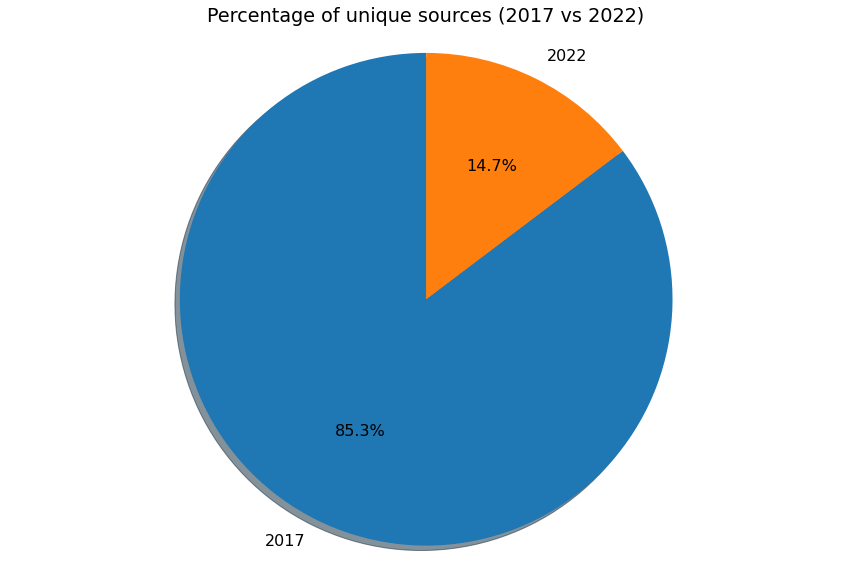

In [115]:
# Plotting the percentage of unique sources between the two election years in a pie chart
labels = '2017', '2022'
total_sources = pen_2017.SourceCommonName.nunique() + pen_2022.SourceCommonName.nunique()
sizes = [pen_2017.SourceCommonName.nunique()/total_sources,pen_2022.SourceCommonName.nunique()/total_sources]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of unique sources (2017 vs 2022)')
plt.show()

In [77]:
# Getting the average of the tone descriptors

# plot_pen_2017 = pen_2017[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]].mean()
# plot_pen_2022 = pen_2022[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]].mean()

pen_2017_avg = pen_2017.mean()
pen_2017_avg

pen_2022_avg = pen_2022.mean()
pen_2022_avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


index                         1.042694e+03
DATE                          2.017042e+13
SourceCollectionIdentifier    1.000000e+00
SocialImageEmbeds                      NaN
TranslationInfo                        NaN
Tone                         -8.563627e-01
Positive Score                2.552131e+00
Negative Score                3.408494e+00
Polarity                      5.960625e+00
Activity Ref. Den.            2.018072e+01
Self_Group Ref. Den.          3.457622e-01
WordCount                     4.930278e+02
dtype: float64

In [96]:
# tone_cols = ["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]

# year = ['2017', '2022']
# avg_tone = [pen_2017_avg["Tone"], pen_2022_avg["Tone"]]
# avg_pscore = [pen_2017_avg["Positive Score"], pen_2022_avg["Positive Score"]]
# avg_nscore = [pen_2017_avg["Negative Score"], pen_2022_avg["Negative Score"]]
# avg_polarity = [pen_2017_avg["Polarity"], pen_2022_avg["Polarity"]]
# avg_ard = [pen_2017_avg["Activity Ref. Den."], pen_2022_avg["Activity Ref. Den."]]
# avg_sgrg = [pen_2017_avg["Self_Group Ref. Den."], pen_2022_avg["Self_Group Ref. Den."]]
# avg_wc = [pen_2017_avg["WordCount"], pen_2022_avg["WordCount"]]

# index = ['year', "Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]
# df_comp = pd.DataFrame({'Year': year, 'Avg. Tone': avg_tone, 'Avg. Positive Score' :avg_pscore, 'Avg. Negative Score' :avg_nscore, 'Avg. Polarity' :avg_polarity,
#                         'Avg. Activity Ref. Den.' :avg_ard, 'Avg. Self_Group Ref. Den.' :avg_sgrg, 'Avg. Wordcount' :avg_wc}, index=index)
# ax = df.plot.bar(rot=0)

Text(0, 0.5, 'Result')

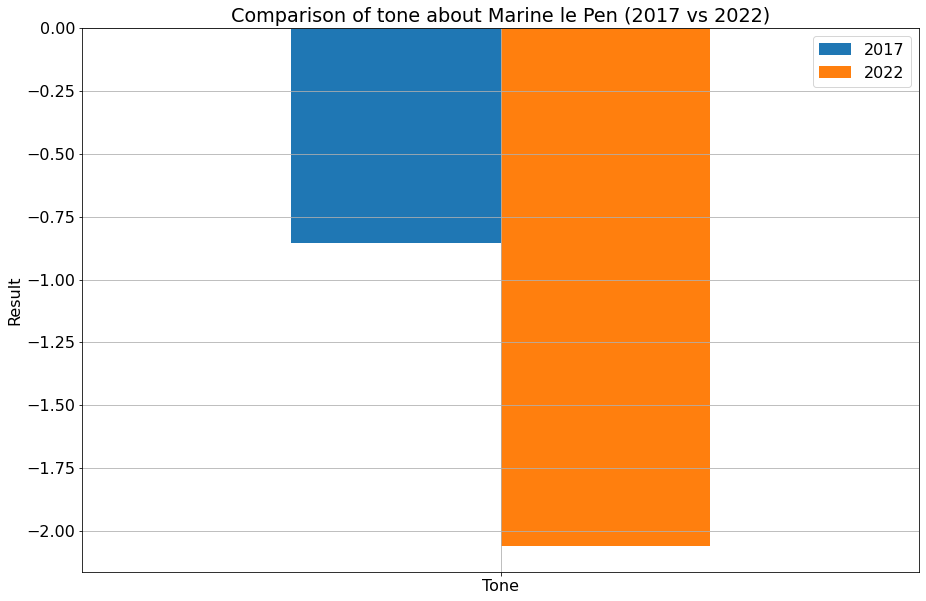

In [118]:
# Plotting the overall tone between the two election years in a bar chart
Y2017t = [pen_2017_avg["Tone"]]
Y2022t = [pen_2022_avg["Tone"]]
index = ["Tone"]
df_comp0 = pd.DataFrame({'2017': Y2017t, '2022': Y2022t}, index=index)
ax = df_comp0.plot.bar(rot=0, title='Comparison of tone about Marine le Pen (2017 vs 2022)', grid=True)
#ax.set_xlabel("x label")
plt.ylabel("Result")

Text(0, 0.5, 'Result')

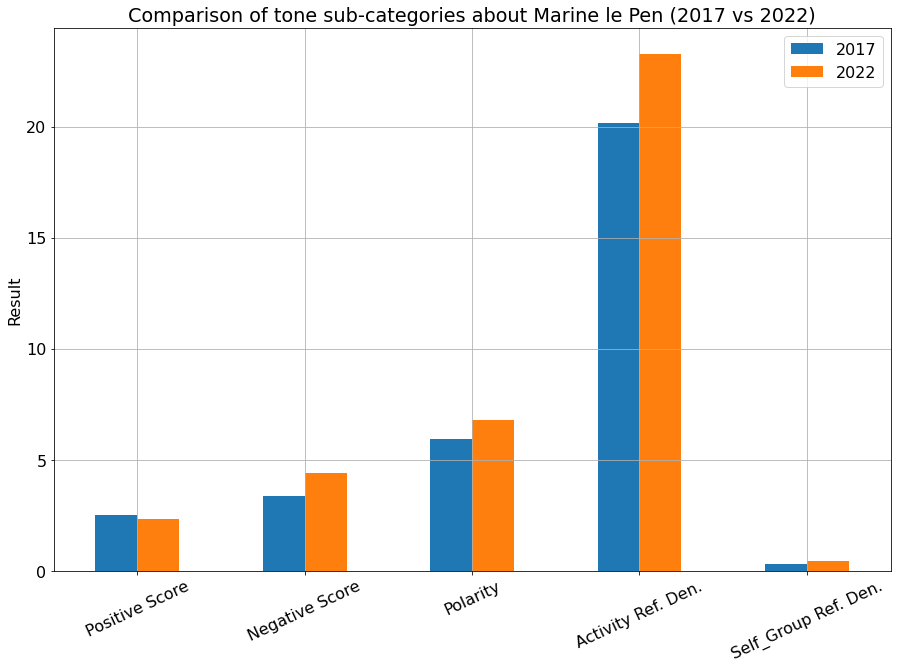

In [119]:
# Plotting the tone sub-categories between the two election years in a bar chart

# Y2017 = [pen_2017_avg["Tone"], pen_2017_avg["Positive Score"], pen_2017_avg["Negative Score"], pen_2017_avg["Polarity"], pen_2017_avg["Activity Ref. Den."], pen_2017_avg["Self_Group Ref. Den."]] #, pen_2017_avg["WordCount"]]
# Y2022 = [pen_2022_avg["Tone"], pen_2022_avg["Positive Score"], pen_2022_avg["Negative Score"], pen_2022_avg["Polarity"], pen_2022_avg["Activity Ref. Den."], pen_2022_avg["Self_Group Ref. Den."]] #, pen_2022_avg["WordCount"]]
# index = ["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den."] #, "WordCount"]
# df_comp = pd.DataFrame({'2017': Y2017, '2022': Y2022}, index=index)
# ax = df_comp.plot.bar(rot=45, title='Comparison of tone sub-categories about Marine le Pen (2017 vs 2022)')
# #ax.set_xlabel("x label")
# plt.ylabel("Result")

Y2017 = [pen_2017_avg["Positive Score"], pen_2017_avg["Negative Score"], pen_2017_avg["Polarity"], pen_2017_avg["Activity Ref. Den."], pen_2017_avg["Self_Group Ref. Den."]] #, pen_2017_avg["WordCount"]]
Y2022 = [pen_2022_avg["Positive Score"], pen_2022_avg["Negative Score"], pen_2022_avg["Polarity"], pen_2022_avg["Activity Ref. Den."], pen_2022_avg["Self_Group Ref. Den."]] #, pen_2022_avg["WordCount"]]
index = ["Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den."] #, "WordCount"]
df_comp = pd.DataFrame({'2017': Y2017, '2022': Y2022}, index=index)
ax = df_comp.plot.bar(rot=25, title='Comparison of tone sub-categories about Marine le Pen (2017 vs 2022)', grid=True)
#ax.set_xlabel("x label")
plt.ylabel("Result")


Text(0, 0.5, 'Number of words')

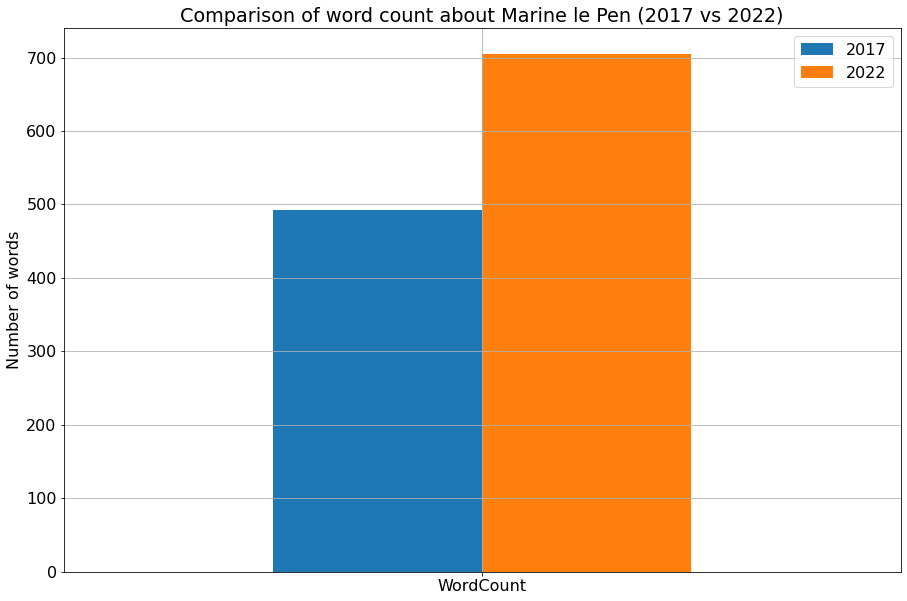

In [117]:
# Plotting the word count between the two election years in a bar chart
Y2017c = [pen_2017_avg["WordCount"]]
Y2022c = [pen_2022_avg["WordCount"]]
index = ["WordCount"]
df_comp = pd.DataFrame({'2017': Y2017c, '2022': Y2022c}, index=index)
ax = df_comp.plot.bar(rot=0, title='Comparison of word count about Marine le Pen (2017 vs 2022)', grid=True)
#ax.set_xlabel("x label")
plt.ylabel("Number of words")

### Miscellaneous 
Tried different things which were unsuccesful! Left here for reference and future works.

In [67]:
# Summarized GDELT Data
# Candidate results are in columns
#sumg = pd.merge(sum_mac, sum_pen, on = ["DATE", "State"], how = "outer")
#sumg["DATE"] = [datetime.datetime.strptime(x[:8], "%Y%m%d") for x in sumg["DATE"].astype("str")]

#sumg["WeekNumber"] = sumg.DATE.dt.week
#weekly_sumg = sumg.groupby(["WeekNumber", "State"]).agg(total_mac_news = ("mac_count", "sum"), total_pen_news = ("pen_count", "sum"), 
#                                          avg_mac_tone = ("mac_tone", "mean"), avg_pen_tone = ("pen_tone", "mean")).reset_index()

# Summarized GDELT Data
# Candidate results are in rows
sumg = sum_pen_2022.append(sum_pen_2017)
sumg["DATE"] = [datetime.datetime.strptime(x[:8], "%Y%m%d") for x in sumg["DATE"].astype("str")]

sumg["WeekNumber"] = sumg.DATE.dt.week
weekly_sumg = sumg.groupby(["WeekNumber", "District", "election_year"]).agg(total_news = ("news_count", "sum"), avg_tone = ("news_tone", "mean")).reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [68]:
weekly_sumg.head(25)

,WeekNumber,District,election_year,total_news,avg_tone
0,14,FR00,2022,2,-1.464435
1,14,FRA9,2022,1,-3.286979
2,14,FRB4,2022,3,-2.046702
3,16,FR,2017,11,-0.545417
4,16,FR00,2017,5,-0.772209
5,16,FRA6,2017,1,-1.008646
6,16,FRB3,2017,2,-2.109705
7,16,FRB4,2017,12,-1.244746
8,16,FRB6,2017,3,1.631741
9,16,FRB9,2017,2,-2.849321


In [69]:
def daily_cand_counts(start_date, end_date, mac, pen):
  """
  Gets daily data from GDELT with 15 min intervals. Counts articles and mean of articles' tone for input names
  """
  import gdelt
  import pandas as pd
  import datetime
  #from datetime import datetime, timedelta
  
  gd2 = gdelt.gdelt(version = 2)
  sd = datetime.datetime.strptime(start_date, '%Y%m%d')
  ed = datetime.datetime.strptime(end_date, '%Y%m%d')

  # Date, candidate, article count, tone
  daily_cand = []

  while start_date <= end_date:
    gkg = gd2.Search([sd, sd + datetime.datetime.timedelta(days = 1)], table = 'gkg', coverage = True)
    cand = gkg.query("Persons.str.contains('" + mac + "') or V2Persons.str.contains('" + mac + "')", engine = "python")
    cand[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(cand["V2Tone"].str.split(",").tolist(), index = cand.index)
    daily_cand.append([start_date, mac, cand.count(), cand.Tone.mean()])
    del cand

    cand = gkg.query("Persons.str.contains('" + pen + "') or V2Persons.str.contains('" + pen + "')", engine = "python")
    cand[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(cand["V2Tone"].str.split(",").tolist(), index = cand.index)
    daily_cand.append([start_date, pen, cand.count(), cand.Tone.mean()])
    del cand
    del gkg

    start_date = start_date + datetime.datetime.timedelta(days = 1)
  return daily_cand

In [70]:
def daily_cand_counts2(date_range, mac, pen):
  """
  Gets daily data from GDELT with 15 min intervals. Counts articles and mean of articles' tone for input names
  """
  import gdelt
  import pandas as pd
  import datetime
  #from datetime import datetime, timedelta
  
  gd2 = gdelt.gdelt(version = 2)
  #sd = datetime.datetime.strptime(start_date, '%Y%m%d')
  #ed = datetime.datetime.strptime(end_date, '%Y%m%d')

  # Date, candidate, article count, tone
  daily_cand = []

  for i in date_range:
    gkg = gd2.Search(i, table = 'gkg')
    cand = gkg.query("Persons.str.contains('" + mac + "') or V2Persons.str.contains('" + mac + "') or AllNames.str.contains('" + mac + "')", engine = "python")
    cand[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(cand["V2Tone"].str.split(",").tolist(), index = cand.index)
    daily_cand.append([i, mac, cand.count(), cand.Tone.mean()])
    del cand

    cand = gkg.query("Persons.str.contains('" + pen + "') or V2Persons.str.contains('" + pen + "') or AllNames.str.contains('" + pen + "')", engine = "python")
    cand[["Tone", "Positive Score", "Negative Score", "Polarity", "Activity Ref. Den.", "Self_Group Ref. Den.", "WordCount"]] = pd.DataFrame(cand["V2Tone"].str.split(",").tolist(), index = cand.index)
    daily_cand.append([i, pen, cand.count(), cand.Tone.mean()])
    del cand
    del gkg


  return daily_cand

In [71]:
#daily_cand_counts2(['20220410', '20220411'], 'Emmanuel', 'Le Pen')

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Trying to manually query the 15min gdelt data so I would get more time points. 
# Doesn't work since the data has 1073 columns which doesn't make sense. Plus no headers. Very complex to orient through.

# https://pythonguides.com/download-zip-file-from-url-using-python/
# importing necessary modules
import requests, zipfile
from io import BytesIO
print('Download started')

time_hours = range(0, 24, 1)

#Defining the zip file URL
url = 'http://data.gdeltproject.org/gdeltv2/20220410164500.gkg.csv.zip'

# Split URL to get the file name
filename= url.split('/')[-1]


# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Download Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/drive/MyDrive/GDELT/') 
print('Extraction Completed')

# with open('/content/drive/MyDrive/GDELT/file.txt', 'w') as f:
#   f.write('test')

Download started
Download Completed
Extraction Completed


In [74]:
df1 = pd.read_csv('/content/drive/MyDrive/GDELT/20220410154500.gkg.csv', on_bad_lines='skip', encoding='latin-1')
gkg_col_names = ['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate', 'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode', 'Actor1EthnicCode',
 'Actor1Religion1Code', 'Actor1Religion2Code', 'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
 'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code', 'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent', 'EventCode', 'CAMEOCodeDescription',
 'EventBaseCode', 'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode',
 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code', 'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID', 'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
 'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code', 'Actor2Geo_Lat', 'Actor2Geo_Long', 'Actor2Geo_FeatureID', 'ActionGeo_Type', 'ActionGeo_FullName', 'ActionGeo_CountryCode', 'ActionGeo_ADM1Code',
 'ActionGeo_ADM2Code', 'ActionGeo_Lat', 'ActionGeo_Long', 'ActionGeo_FeatureID', 'DATEADDED', 'SOURCEURL']
display(df1.shape)
display(df1.head(5))
#f1.shape
#len(df1)
display(len(gkg_col_names))

(459, 1073)

,20220410154500-0\t20220410154500\t1\tstraitstimes.com\thttps://www.straitstimes.com/asia/east-asia/hong-kong-chief-candidate-lee-secures-nominations-needed-to-run\t\t\tTAX_FNCACT;TAX_FNCACT_CANDIDATE;GENERAL_GOVERNMENT;EPU_POLICY;EPU_POLICY_GOVERNMENT;TAX_FNCACT_CHIEF;TAX_FNCACT_SECRETARY;MEDIA_MSM;TAX_FNCACT_DEPUTY;TAX_FNCACT_DIRECTOR;RESIGNATION;TAX_FNCACT_OFFICIAL;TAX_FNCACT_EXECUTIVE;TAX_FNCACT_CHIEF_EXECUTIVE;EPU_ECONOMY_HISTORIC;USPEC_POLICY1;EPU_POLICY_POLITICAL;TAX_ETHNICITY;TAX_ETHNICITY_CHINESE;TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_CHINESE;LEADER;TAX_FNCACT_PRESIDENT;USPEC_POLITICS_GENERAL1;CRISISLEX_C07_SAFETY;TAKE_OFFICE;UNGP_FORESTS_RIVERS_OCEANS;TAX_FNCACT_SPOKESMAN;\tTAX_FNCACT_DEPUTY,370;GENERAL_GOVERNMENT,77;GENERAL_GOVERNMENT,2012;EPU_POLICY_GOVERNMENT,77;EPU_POLICY_GOVERNMENT,2012;TAX_FNCACT_DIRECTOR,379;TAX_FNCACT_DIRECTOR,1276;TAX_FNCACT_CANDIDATE,49;TAX_FNCACT_CANDIDATE,483;EPU_POLICY_POLITICAL,1343;EPU_POLICY_POLITICAL,1866;MEDIA_MSM,337;TAX_FNCACT_EXECUTIVE,786;TAX_FNCACT_EXECUTIVE,841;TAX_FNCACT_EXECUTIVE,1759;USPEC_POLICY1,1149;CRISISLEX_C07_SAFETY,1639;TAX_FNCACT_SPOKESMAN,2022;TAX_FNCACT_CHIEF,267;TAX_FNCACT_CHIEF,776;TAX_FNCACT_CHIEF,831;TAX_FNCACT_CHIEF,1749;EPU_ECONOMY_HISTORIC,1057;UNGP_FORESTS_RIVERS_OCEANS,1827;RESIGNATION,589;TAX_FNCACT_CHIEF_EXECUTIVE,786;TAX_FNCACT_CHIEF_EXECUTIVE,841;TAX_FNCACT_CHIEF_EXECUTIVE,1759;TAKE_OFFICE,1776;LEADER,1588;TAX_FNCACT_PRESIDENT,1588;USPEC_POLITICS_GENERAL1,1588;TAX_FNCACT_OFFICIAL,627;TAX_FNCACT_SECRETARY,277;TAX_ETHNICITY_CHINESE,1578;TAX_WORLDLANGUAGES_CHINESE,1578;\t4#Beijing,Beijing,China#CH#CH22#39.9289#116.388#-1898541;1#China#CH#CH#35#105#CH;1#United Kingdom#UK#UK#54#-4#UK;1#Hong Kong#HK#HK#22.25#114.166667#HK\t1#Chinese#CH#CH##35#105#CH#1578;4#Beijing,Beijing.1,China#CH#CH22#13001#39.9289#116.388#-1898541#1524;4#Beijing,Beijing.2,China#CH#CH22#13001#39.9289#116.388#-1898541#1923;1#Hong Kong#HK#HK##22.25#114.166667#HK#9;1#Hong Kong#HK#HK##22.25#114.166667#HK#31;1#Hong Kong#HK#HK##22.25#114.166667#HK#612;1#Hong Kong#HK#HK##22.25#114.166667#HK#1465;1#British#UK#UK##54#-4#UK#1661;1#China#CH#CH##35#105#CH#229;1#China#CH#CH##35#105#CH#647;1#China#CH#CH##35#105#CH#1514;1#China#CH#CH##35#105#CH#1531;1#China#CH#CH##35#105#CH#1806;1#China#CH#CH##35#105#CH#1930\tjohn lee;chan yung;tam yiu-chung\tJohn Lee,174;Chan Yung,359\tsouth china morning post\tSouth China Morning Post,242\t0.533333333333333,2.4,1.86666666666667,4.26666666666667,17.3333333333333,0,336\t4#4#4#0#880;4#7#1#0#1818;4#5#8#0#2000\twc:336,c12.1:23,c12.10:27,c12.12:6,c12.13:10,c12.14:13,c12.3:9,c12.4:4,c12.5:14,c12.7:15,c12.8:13,c12.9:23,c13.11:1,c13.12:1,c14.1:13,c14.10:18,c14.11:29,c14.2:21,c14.3:14,c14.4:4,c14.5:29,c14.6:1,c14.7:3,c14.8:1,c14.9:1,c15.10:1,c15.102:1,c15.11:1,c15.110:1,c15.112:1,c15.119:1,c15.122:1,c15.128:1,c15.147:1,c15.148:2,c15.156:1,c15.160:1,c15.176:2,c15.179:2,c15.18:2,c15.197:1,c15.201:1,c15.203:1,c15.207:1,c15.212:1,c15.225:2,c15.233:1,c15.248:1,c15.251:1,c15.252:1,c15.26:1,c15.57:1,c15.71:1,c15.72:1,c15.75:1,c15.80:1,c15.84:1,c15.86:1,c15.89:1,c16.100:11,c16.101:9,c16.103:1,c16.105:2,c16.106:4,c16.109:15,c16.11:9,c16.110:51,c16.113:1,c16.114:8,c16.115:6,c16.116:8,c16.117:9,c16.118:11,c16.12:19,c16.120:16,c16.121:54,c16.122:2,c16.124:2,c16.125:24,c16.126:17,c16.127:24,c16.128:4,c16.129:38,c16.13:1,c16.130:9,c16.131:6,c16.134:36,c16.135:1,c16.136:1,c16.137:1,c16.138:17,c16.139:5,c16.140:5,c16.142:2,c16.143:3,c16.145:36,c16.146:35,c16.147:1,c16.149:2,c16.150:2,c16.153:13,c16.155:5,c16.156:1,c16.157:11,c16.158:1,c16.159:24,c16.16:4,c16.161:21,c16.162:23,c16.163:22,c16.164:5,c16.165:3,c16.17:2,c16.19:9,c16.2:52,c16.21:5,c16.22:8,c16.23:4,c16.24:4,c16.26:30,c16.27:1,c16.28:3,c16.3:11,c16.31:23,c16.32:2,c16.33:20,c16.34:1,c16.35:11,c16.36:1,c16.37:28,c16.38:9,c16.39:1,c16.4:11,c16.41:5,c16.42:1,c16.43:1,c16.45:8,c16.46:2,c16.47:48,c16.48:3,c16.49:1,c16.5:2,c16.50:3,c16.51:2,c16.52:27,c16.53:1,c16.54:2,c16.55:5,c16.56:10,c16.57:175,c16.58:14,c16.6:29,c16.60:10,c16.61:1,c16.

62